In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:

df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\15. Clustering\\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop('CustomerID',axis = 1,inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.shape

(200, 4)

df.isnull().sum()

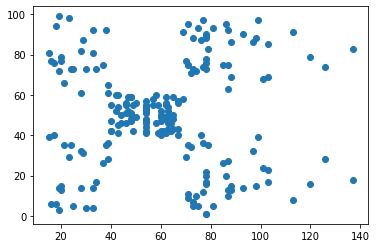

In [6]:
a = df.iloc[:,2]
b = df.iloc[:,3]
plt.scatter(a,b)
plt.show()

# Dendrogram

In [7]:
X = df.iloc[:, [2,3]].values

In [8]:
import scipy.cluster.hierarchy as sch

In [9]:
data = sch.linkage(X, method = 'ward')

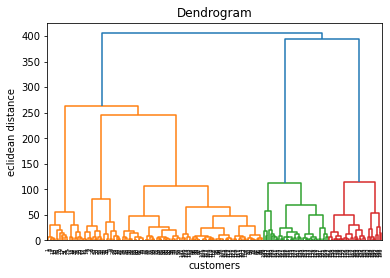

In [10]:
dendrogram = sch.dendrogram(data)
plt.figure(1,figsize=(15,15))

plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('eclidean distance')
plt.show()

# Hierarchical Clustering Model 

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5 , affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

In [12]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# visualization of scatterplot

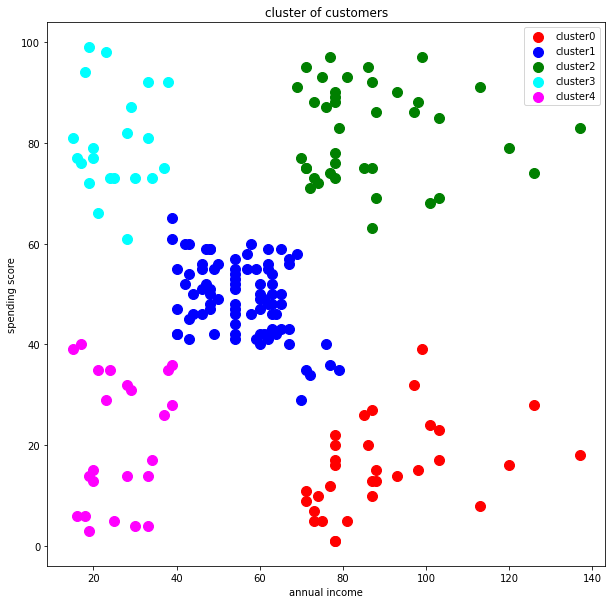

In [13]:
# plt.savefig('subplot.jpg')

plt.figure(1,figsize=(10,10))

plt.scatter(X[y_hc==0,0], X[y_hc ==0,1],s = 100 ,c = 'red', label = 'cluster0')

plt.scatter(X[y_hc==1,0], X[y_hc ==1,1],s = 100 ,c = 'blue', label = 'cluster1')

plt.scatter(X[y_hc==2,0], X[y_hc ==2,1],s = 100 ,c = 'green', label = 'cluster2')

plt.scatter(X[y_hc==3,0], X[y_hc ==3,1],s = 100 ,c = 'cyan', label = 'cluster3')

plt.scatter(X[y_hc==4,0], X[y_hc ==4,1],s = 100 ,c = 'magenta', label = 'cluster4')


plt.title('cluster of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [14]:
df1 = pd.DataFrame(y_hc,columns = ['cluster'])

In [15]:
df1

,cluster
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [16]:
final = pd.concat([df,df1],axis = 1)
final

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


In [17]:
cluster0 = final[final['cluster']==0]
cluster1 = final[final['cluster']==1]
cluster2 = final[final['cluster']==2]
cluster3 = final[final['cluster']==3]
cluster4 = final[final['cluster']==4]

In [18]:
c=pd.crosstab(final.Genre,final.cluster,margins = True)
c

cluster,0,1,2,3,4,All
Genre,,,,,,
Female,14,51,21,12,14,112
Male,18,34,18,9,9,88
All,32,85,39,21,23,200


<AxesSubplot:xlabel='Genre'>

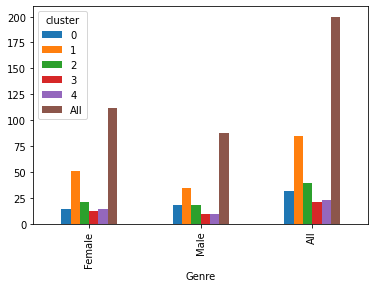

In [19]:
c.plot(kind='bar',stacked=False)


In [20]:
pd.crosstab(df.Age,final.cluster,margins = True)

cluster,0,1,2,3,4,All
Age,,,,,,
18,0,3,0,1,0,4
19,2,5,0,0,1,8
20,1,1,0,2,1,5
21,0,2,0,3,0,5
22,0,1,0,2,0,3
23,0,3,0,3,0,6
24,0,2,0,2,0,4
25,1,1,0,1,0,3
26,0,2,0,0,0,2


In [21]:
pd.crosstab(df['Annual Income (k$)'],final.cluster,margins = True)

cluster,0,1,2,3,4,All
Annual Income (k$),,,,,,
15,0,0,0,1,1,2
16,0,0,0,1,1,2
17,0,0,0,1,1,2
18,0,0,0,1,1,2
19,0,0,0,2,2,4
...,...,...,...,...,...,...
113,1,0,1,0,0,2
120,1,0,1,0,0,2
126,1,0,1,0,0,2


In [22]:
g=final.groupby('cluster').mean()
g

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,41.000000,89.406250,15.593750
1,42.482353,55.811765,49.129412
2,32.692308,86.538462,82.128205
3,25.333333,25.095238,80.047619
4,45.217391,26.304348,20.913043


<AxesSubplot:xlabel='cluster'>

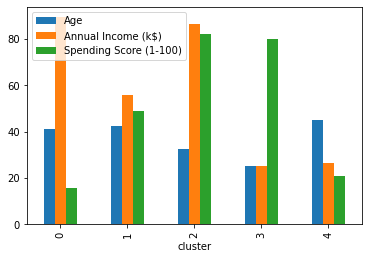

In [23]:
g.plot(kind='bar',stacked=False)